## Heart Disease UCI Dataset

### You can find out this dataset [here](https://www.kaggle.com/ronitf/heart-disease-uci)

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
#importing necessary packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

# Data Preprocessing 

In [3]:
df = pd.read_csv('heart.csv')
df.head(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1
7,44,1,1,120,263,0,1,173,0,0.0,2,0,3,1
8,52,1,2,172,199,1,1,162,0,0.5,2,0,3,1
9,57,1,2,150,168,0,1,174,0,1.6,2,0,2,1


In [4]:
df.shape

(303, 14)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
age         303 non-null int64
sex         303 non-null int64
cp          303 non-null int64
trestbps    303 non-null int64
chol        303 non-null int64
fbs         303 non-null int64
restecg     303 non-null int64
thalach     303 non-null int64
exang       303 non-null int64
oldpeak     303 non-null float64
slope       303 non-null int64
ca          303 non-null int64
thal        303 non-null int64
target      303 non-null int64
dtypes: float64(1), int64(13)
memory usage: 33.2 KB


In [6]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [7]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

# Data Visualization

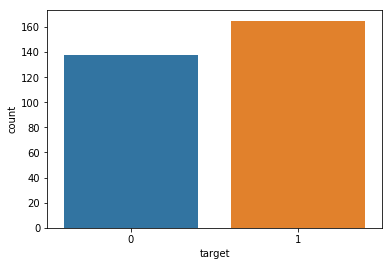

In [8]:
import seaborn as sns

sns.countplot(x= 'target', data= df)

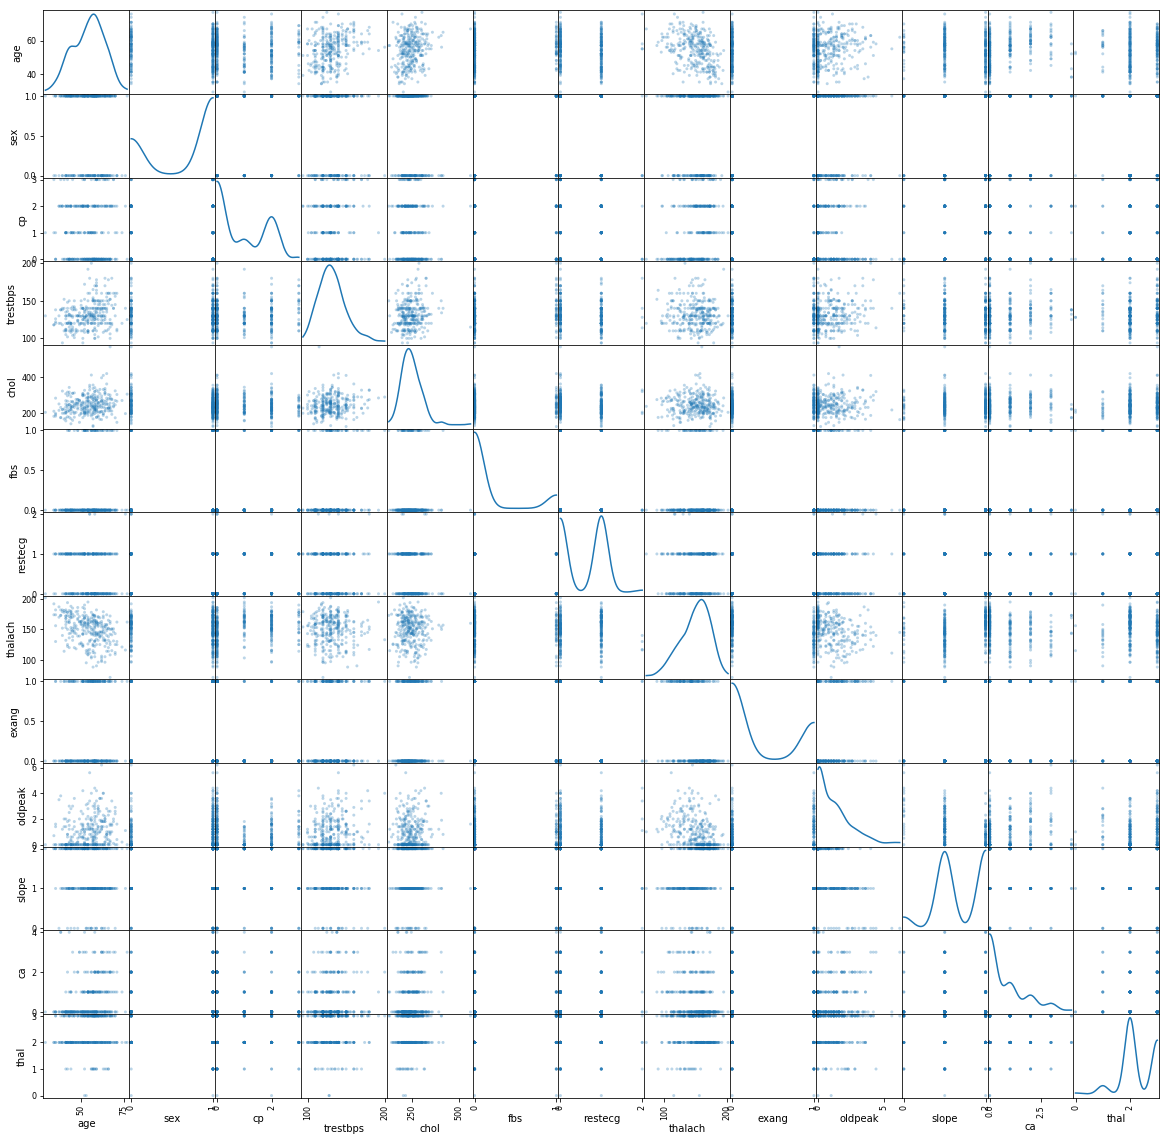

In [9]:
pd.plotting.scatter_matrix(df.drop(['target'], axis=1), alpha = 0.3, figsize = (20,20), diagonal = 'kde');

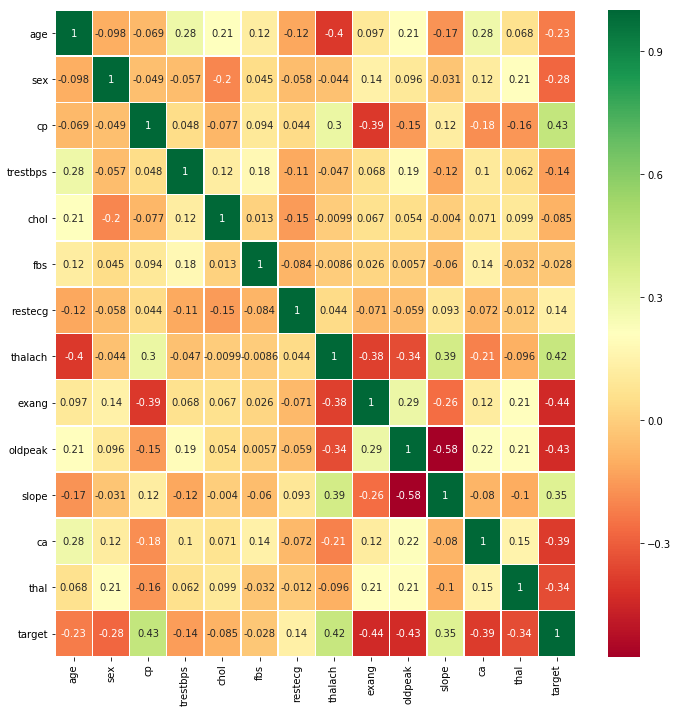

In [10]:
import seaborn as sns

plt.figure(figsize=(10,10))
corr = df.corr()
sns.heatmap(corr, linewidths=0.5, cmap='RdYlGn', annot=True)
plt.tight_layout()
plt.show()

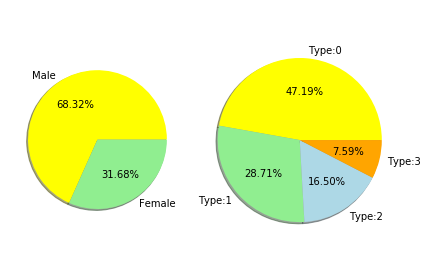

In [11]:
# Plot
plt.subplot(1,2,1)
size = df['sex'].value_counts()
labels = "Male", "Female"
colors = ['yellow', 'lightgreen']
explode = [0,0]
plt.pie(size, explode=explode, labels=labels, colors=colors, autopct='%.2f%%', shadow=True)

plt.subplot(1,2,2)
size = df['cp'].value_counts()
labels = "Type:0", "Type:1", "Type:2", "Type:3"
colors = ['yellow', 'lightgreen', 'lightblue', 'orange']
explode = [0,0,0,0]
plt.pie(size, explode=explode, labels=labels, colors=colors, autopct='%.2f%%', shadow=True)
 
plt.axis('equal')
plt.tight_layout()
plt.show()

# Observations:
* Plot 1: The data has more entries for males as compared to females but according to data this plot shows us that males are more likely to suffer from heart diseases as compared to females.
* Plot 2: This plot shows us that chest pain type 0 experienced by peoples are more likely to suffer from heart diseases.

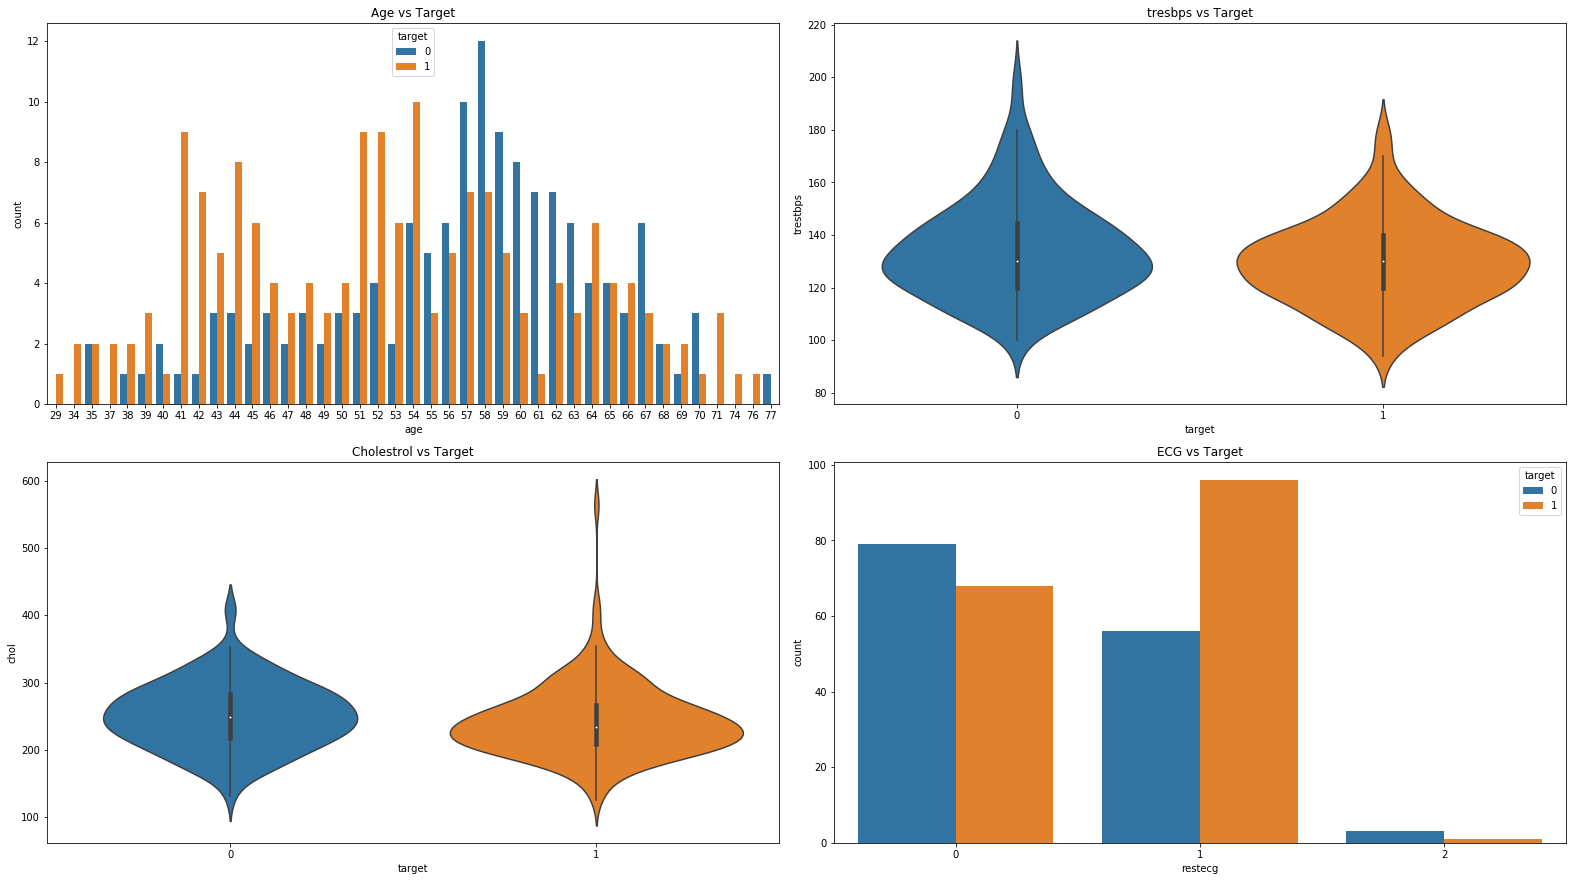

In [12]:
# Plot
plt.figure(figsize = (22,18))

plt.subplot(3,2,1)
sns.countplot(x='age',data = df, hue = 'target')
plt.title('Age vs Target')

plt.subplot(3,2,2)
sns.violinplot(df['target'], df['trestbps'])
plt.title('tresbps vs Target')

plt.subplot(3,2,3)
sns.violinplot(df['target'], df['chol'])
plt.title('Cholestrol vs Target')

plt.subplot(3,2,4)
sns.countplot(x='restecg', data = df, hue = 'target')
plt.title('ECG vs Target')

plt.tight_layout()
plt.show()

# Observations:
* Plot 1: This plot shows us that most people are suffering from heart diseases are having age between 50-65 years.
* Plot 2: This plot shows us that the people who have heart diseases more likely to have low blood pressure.
* Plot 3: This plot shows us that the people likely to suffer from heart diseases are having higher cholesterol levels as compared to people who are not suffering from heart diseases.
* Plot 4: This plot shows us that the more number of patients have restecg value 1 are suffering from heart diseases whereas more number of patients not likely to suffer from heart diseases are having restscg value 0 and 2.

In [13]:
categorical_columns = ['cp', 'thal', 'slope']

for i in categorical_columns:
    a = pd.get_dummies(df[i], prefix = i)
    df = pd.concat([df,a],axis=1)
    df.drop([i],axis=1,inplace=True)
    
df.head()    

,age,sex,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,ca,...,cp_1,cp_2,cp_3,thal_0,thal_1,thal_2,thal_3,slope_0,slope_1,slope_2
0,63,1,145,233,1,0,150,0,2.3,0,...,0,0,1,0,1,0,0,1,0,0
1,37,1,130,250,0,1,187,0,3.5,0,...,0,1,0,0,0,1,0,1,0,0
2,41,0,130,204,0,0,172,0,1.4,0,...,1,0,0,0,0,1,0,0,0,1
3,56,1,120,236,0,1,178,0,0.8,0,...,1,0,0,0,0,1,0,0,0,1
4,57,0,120,354,0,1,163,1,0.6,0,...,0,0,0,0,0,1,0,0,0,1


In [14]:
X= df.drop('target',axis=1)
y=df['target']

In [15]:
#Shuffle and split the data into training and test sets
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=.3, random_state=42)

In [16]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((212, 21), (91, 21), (212,), (91,))

In [17]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

D:\anaconda\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
D:\anaconda\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
D:\anaconda\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
D:\anaconda\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [18]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn import metrics

In [19]:
# view confusion matrix with a heatmap
def confusion_matrix(cm, name):
    plt.figure()
    sns.heatmap(cm, annot=True, annot_kws={"size":30}, cmap='Blues', square=True, fmt='.0f')
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.title(name);

In [20]:
def classification_model(model, X_train, y_train, X_test, y_test):
    model.fit(X_train,y_train)
    predictions = model.predict(X_test)
  
    accuracy = metrics.accuracy_score(predictions,y_test)
    print ("Accuracy : %s" % "{0:.3%}".format(accuracy))
    
    cvs = cross_val_score(estimator = model, X = X_train, y = y_train, cv = 10)
    
    print("Cross-Validation Score : %s" % "{0:.3%}".format(cvs.mean()))
    
    cm = metrics.confusion_matrix(y_true=y_test, y_pred=predictions)
    return cm

Logistic Regression:
Accuracy : 83.516%
Cross-Validation Score : 82.643%
KNeighborsClassifier:
Accuracy : 85.714%
Cross-Validation Score : 83.076%
Random Forest:
Accuracy : 84.615%
Cross-Validation Score : 82.009%


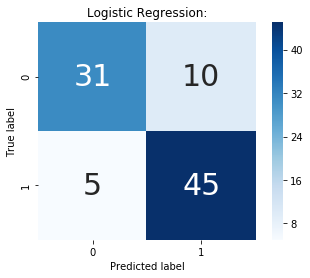

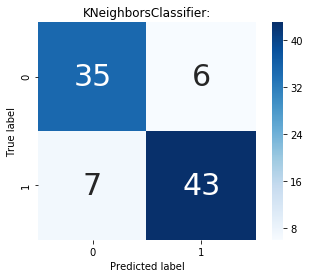

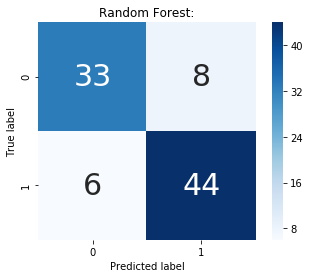

In [21]:
models = []
models.append(("Logistic Regression:",LogisticRegression()))
models.append(("KNeighborsClassifier:",KNeighborsClassifier(n_neighbors = 17)))
models.append(("Random Forest:",RandomForestClassifier(n_estimators=25)))

for name,model in models:
    print(name)
    cm = classification_model(model, X_train, y_train, X_test, y_test)
    confusion_matrix(cm, name)